<h1>Autocorrelación espacial y análisis exploratorio de datos</h1>
<p>Esta práctica está basada en el curso Geographic Data Science del Dr. Dani Arribas-Bel de la Universidad de Liverpool </p>
<a href="http://darribas.org/gds18/"> Geographic Data Science</a>

In [50]:
%matplotlib inline

import seaborn as sns
import pandas as pd
import pysal as ps
import geopandas as gpd
import numpy as np
import contextily as ctx
import matplotlib.pyplot as plt

np.random.seed(123)

# En esta práctica se utiliza la version 1.14.4 de pysal (conda install pysal=1.14.4)
# El código tiene que ser adaptado para funcionar con la versión actual de pysal 2.0.0

<h3>Datos </h3>
<p>Para esta sesión, utilizaremos los datos del referendum de 2016 referentes al abandono de la unión Europea por parte de la Gran Bretaña. En particular, abordaremos la distribución espacial del voto por dejar la unión, que al final fue la opción ganadora. Desde el punto de vista técnico, trabajaremos con polígonos con atributos relacionados (porcentje del electorado que votó por dejar la Unión Europea.Los datos se encuentran en un formato llamado <a href= "http://www.geopackage.org/">GeoPackage</a> que presenta varias ventajas sobre el archivo shapefile. El archivo se puede descargar de: </p>
<a href="http://darribas.org/gds18/content/labs/data/brexit.gpkg">http://darribas.org/gds18/content/labs/data/brexit.gpkg</a>
<p>Una vez descargados y descomprimidos en tu computadora, asigna la ruta al archivo</p>

In [2]:
# Esta ruta depende de tu computadora
br_path = 'brexit.gpkg'

<p>De manera alternativa, puedes leer el archivo desde una ubicación en la Web (si tienes conexión a Internet).

In [3]:
br_path = 'http://darribas.org/gds18/content/labs/data/brexit.gpkg'

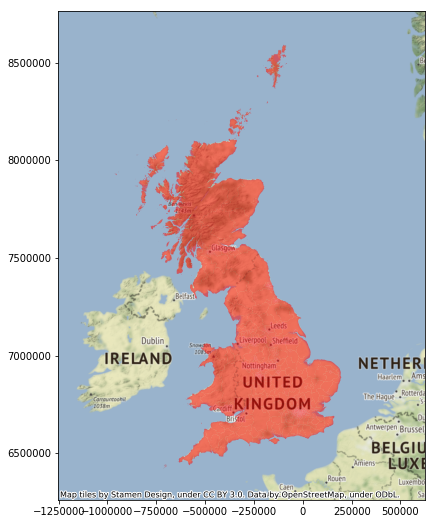

In [4]:
# Carga las geometrías de autoridad local utilizando su ID como índice
br = gpd.read_file(br_path).set_index('LAD14CD')
# Transforma a Web Mercator CRS y grafica 
ax = br.to_crs(epsg=3857).plot(figsize=(9, 9), alpha=0.5, color='red');
# Agrega mapa base
ctx.add_basemap(ax)

<p>Inspeccionamos los primeros renglones</p>

In [5]:
br.head()

,OBJECTID,LAD14NM,LAD14NMW,id,Region_Cod,Region,Area,Electorate,ExpectedBa,VerifiedBa,...,Leave,Rejected_B,No_officia,Voting_for,Writing_or,Unmarked_o,Pct_Remain,Pct_Leave,Pct_Reject,geometry
LAD14CD,,,,,,,,,,,,,,,,,,,,,
E06000001,1,Hartlepool,None,70,E12000001,North East,Hartlepool,70341,46137,46134,...,32071,34,0,12,6,16,30.43,69.57,0.07,(POLYGON ((-141202.2247538128 7308889.30724948...
E06000002,2,Middlesbrough,None,71,E12000001,North East,Middlesbrough,94612,61395,61393,...,40177,35,0,16,1,18,34.52,65.48,0.06,(POLYGON ((-139272.6147402543 7282988.17015898...
E06000003,3,Redcar and Cleveland,None,72,E12000001,North East,Redcar and Cleveland,103529,72741,72741,...,48128,27,0,6,0,21,33.81,66.19,0.04,(POLYGON ((-126494.2180474423 7293275.07815044...
E06000004,4,Stockton-on-Tees,None,73,E12000001,North East,Stockton-on-Tees,141486,100462,100460,...,61982,45,2,13,2,28,38.27,61.73,0.04,(POLYGON ((-146637.9701511812 7293230.45217288...
E06000005,5,Darlington,None,74,E12000001,North East,Darlington,77662,55194,55195,...,30994,29,0,0,0,29,43.82,56.18,0.05,(POLYGON ((-182304.3195254522 7287910.29990318...


<h3>Se hace un mapa de coropletas</h3>

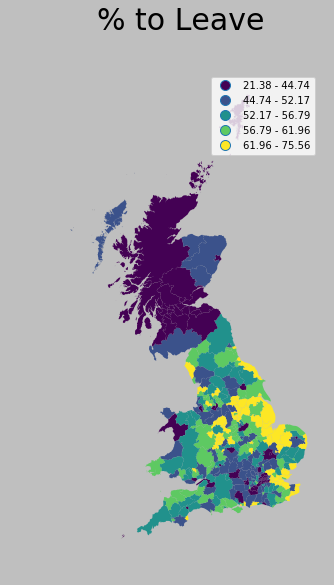

In [6]:
# Se ajusta la figura y los ejes
f, ax = plt.subplots(1, figsize=(9, 9))
# Grafica % en favor 
br.plot(column='Pct_Leave', scheme='Quantiles', 
        legend=True, ax=ax)
# Remueve el marco de los ejes
ax.set_axis_off()
# Cambia el color de fondo
f.set_facecolor('0.75')
# Titulo
f.suptitle('% to Leave', size=30)
# Despliegue de la gráfica
plt.show()

<h3>Ejercicio:</h3>
<p>Crea un mapa similar utilizando una clasificación por intervalos iguales. ¿Cómo difieren los mapas? También puedes generar un  histograma de los datos</p>

<h2> Matriz de pesos </h2>
<p>Constuiremos una metriz de pesos por contiguidad de reina.</p>


In [7]:
#Crea la matriz de pesos espaciales
# NOTA: Dependiendo del número de polígonos y la geometría este proceso puede tardar varios minutos
%time w = ps.weights.Queen.from_dataframe(br)

Wall time: 27.8 s


C:\Users\Alberto\Anaconda3\lib\site-packages\pysal\weights\weights.py:189: UserWarning: There are 6 disconnected observations
  warnings.warn("There are %d disconnected observations" % ni)
C:\Users\Alberto\Anaconda3\lib\site-packages\pysal\weights\weights.py:190: UserWarning: Island ids: E06000046, E06000053, S12000013, S12000023, S12000027, W06000001
  warnings.warn("Island ids: %s" % ', '.join(str(island) for island in self.islands))


<p>Consultamos las observaciones vecinas a un polígono</p>

In [14]:
w['E08000012']

{'E08000011': 1.0,
 'E08000015': 1.0,
 'E06000006': 1.0,
 'E06000050': 1.0,
 'E08000014': 1.0}

<p>Ahora revisamos la ubicación de los polígonos que fueron marcados como islas en la matriz de pesos</p>

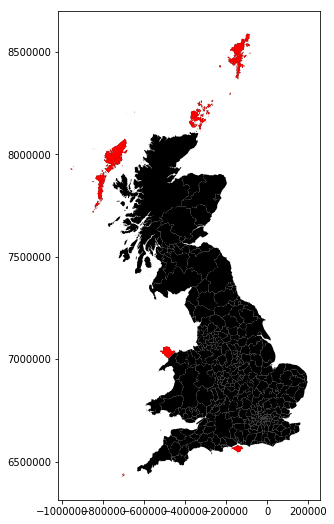

In [15]:
ax = br.plot(color='k', figsize=(9, 9))
br.loc[w.islands, :].plot(color='red', ax=ax);

<p>¿Que se puede hacer para quitar los problemas dados por las islas?</p>
<p>En este caso, eliminamos las islas</p>

In [17]:
br = br.drop(w.islands)

<p>Una vez eliminadas las islas, necesitamos recalcular la matriz de pesos</p>

In [18]:
# Crea matriz de pesos
# Puede tardar
%time w = ps.weights.Queen.from_dataframe(br)

Wall time: 21 s


<p>Podemos estandarizar los renglones de la matriz de pesos de manera que cada renglon sume a 1</p>

In [20]:
# Estandariza los renglones de la matriz de pesos
w.transform = 'R'

<p>Vemos ahora que los pesos para cada renglón suman a 1</p>

In [22]:
w['E08000012']

{'E08000011': 0.2,
 'E08000015': 0.2,
 'E06000006': 0.2,
 'E06000050': 0.2,
 'E08000014': 0.2}

<h2>Retardo espacial</h2>
<p>Una vez que tenemos los datos y la matriz de pesos espaciales, calculamos la variable de retardo espacial del porecntaje de votos a favor de dejar la Unión Europea. El retardo espacial es el producto de la matriz de pesos y la variable, si la matriz de pesos está estandarizada por renglones, el resultado da el porcentaje promedio de votos en la vecindad de una observación</p>

In [25]:
br['w_Pct_Leave'] = ps.lag_spatial(w, br['Pct_Leave'])

<p>Comparamos la variable resultante con la variable original</p>

In [26]:
br[['LAD14NM', 'Pct_Leave', 'w_Pct_Leave']].head()

,LAD14NM,Pct_Leave,w_Pct_Leave
LAD14CD,,,
E06000001,Hartlepool,69.57,61.823333
E06000002,Middlesbrough,65.48,60.526667
E06000003,Redcar and Cleveland,66.19,62.486000
E06000004,Stockton-on-Tees,61.73,61.438333
E06000005,Darlington,56.18,57.430000


<p>¿Cómo se interpretan los resultados de la tabla anterior?</p>
<p>Los siguientes pasos sirven para hacer una comprobación de estos resultados</p>

In [27]:
w.neighbors['E06000001']

['E06000004', 'E06000047', 'E06000003']

In [28]:
neis = br.loc[w.neighbors['E06000001'], 'Pct_Leave']
neis

LAD14CD
E06000004    61.73
E06000047    57.55
E06000003    66.19
Name: Pct_Leave, dtype: float64

In [29]:
neis.mean()

61.82333333333333

<p>Para algunas aplicaciones hace más sentido el trabajar con una versión estandarizada de la variable, en lugar de la variable original</p>
<p>Esto es, extraer a los valores la media y dividir por la desviación estandar cada observación. Ejemplo:</p>

In [31]:
br['Pct_Leave_std'] = (br['Pct_Leave'] - br['Pct_Leave'].mean()) / br['Pct_Leave'].std()

<p>Finalmente, para poder explorar los patrones espaciales de los valores estandarizads, llamados valores z, necesitamos crear su retardo espacial:</p>

In [33]:
br['w_Pct_Leave_std'] = ps.lag_spatial(w, br['Pct_Leave_std'])

<h2>Autocorrelación espacial global</h2>
<p> Con la variable estandarizada podemos crear el diagrama de dispersión de Moran</p>

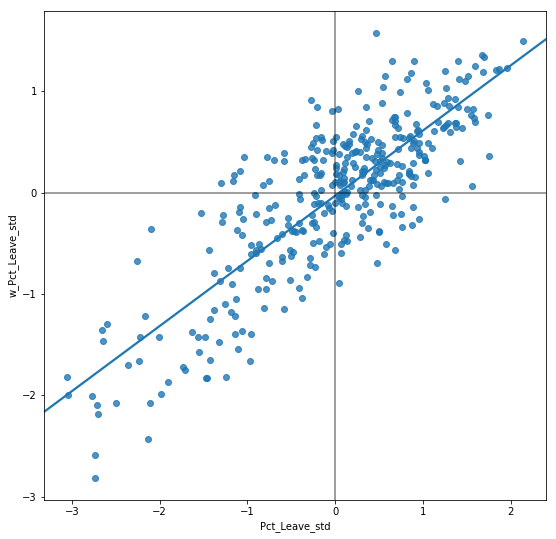

In [35]:
# Ajustamos la figura y los ejes
f, ax = plt.subplots(1, figsize=(9, 9))
# Graficamos 
sns.regplot(x='Pct_Leave_std', y='w_Pct_Leave_std', data=br, ci=None)
# Agergamos líneas horizontal y vertical
plt.axvline(0, c='k', alpha=0.5)
plt.axhline(0, c='k', alpha=0.5)
# Despliegue
plt.show()

<h3>I de Moran</h3>
<p>A continuación calculamos la I de Moran</p>

In [37]:
mi = ps.Moran(br['Pct_Leave'], w)

In [38]:
#Desplegamos el valor de la I de Moran
mi.I

0.6431732058159241

In [39]:
# Obtenemos la pseudo significancia del patrón observado
mi.p_sim

0.001

<p>¿Cómo se interpreta el valor obtenido?</p>

<h3> Autocorrelación espacial local </h3>
<p> Recordemos las relaciones en el diagrama de dispersión de moran </p>

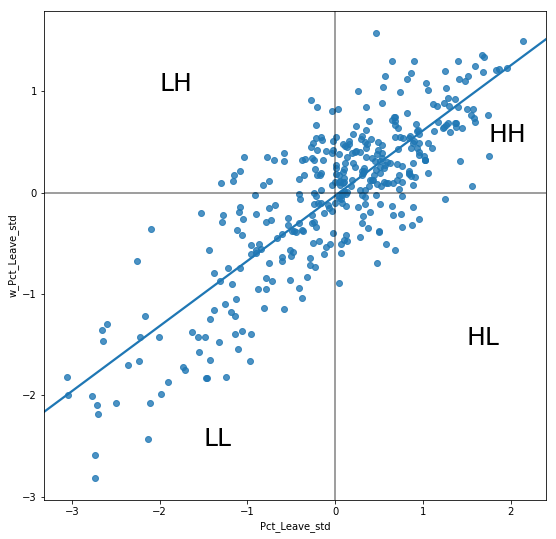

In [42]:
# Ajustamos la figura y los ejes
f, ax = plt.subplots(1, figsize=(9, 9))
# Graficamos los valores
sns.regplot(x='Pct_Leave_std', y='w_Pct_Leave_std', data=br, ci=None)
# Agregamos líneas verticales, horizontales y etiquetas
plt.axvline(0, c='k', alpha=0.5)
plt.axhline(0, c='k', alpha=0.5)
plt.text(1.75, 0.5, "HH", fontsize=25)
plt.text(1.5, -1.5, "HL", fontsize=25)
plt.text(-2, 1, "LH", fontsize=25)
plt.text(-1.5, -2.5, "LL", fontsize=25)
# Desplegamos la gráfica
plt.show()

<p>Calculamos los indicadores locales de asociación espacial. Solo requerimos la variable de interés y la matriz de pesos espaciales</p>

In [43]:
lisa = ps.Moran_Local(br['Pct_Leave'], w)

<p>Podemos separar las observaciones en las que son significativas y las que no lo son.</p>

In [45]:
# Separa a las observaciones en significativas o no
br['significant'] = lisa.p_sim < 0.05
# Almacenamos el cuadrante al que pertenecen las observaciones
br['quadrant'] = lisa.q

<p>Muestra las primeras observaciones</p>

In [46]:
br['significant'].head()

LAD14CD
E06000001    False
E06000002    False
E06000003     True
E06000004     True
E06000005    False
Name: significant, dtype: bool

<p>Revisamos la pesudo-significancia de las primeras cinco observaciones</p>

In [47]:
lisa.p_sim[:5]

array([0.074, 0.104, 0.015, 0.023, 0.235])

<p>También podemos observar a qué cuadrante pertenecen las observaciones</p>

In [48]:
br['quadrant'].head()

LAD14CD
E06000001    1
E06000002    1
E06000003    1
E06000004    1
E06000005    1
Name: quadrant, dtype: int32

<p>¿Qué tipo de autocorrelación local corresponde a cada cuadrante?</p>

<h3>Mapa de clusters</h3>

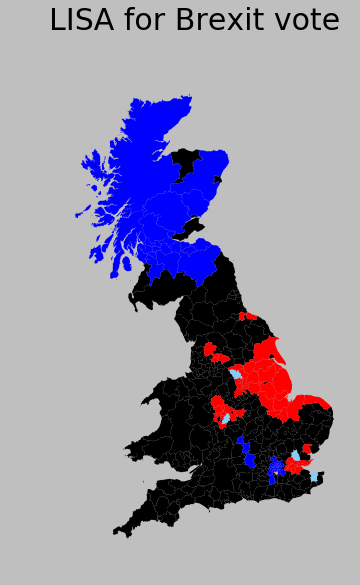

In [49]:
# Ajusta la figura y los ejes
f, ax = plt.subplots(1, figsize=(9, 9))
# Grafica observaciones no significativas
ns = br.loc[br['significant']==False, 'geometry']
ns.plot(ax=ax, color='k')
# Grafica clusters Alto-Alto
hh = br.loc[(br['quadrant']==1) & (br['significant']==True), 'geometry']
hh.plot(ax=ax, color='red')
# Grafica clusters Bajo-Bajo
ll = br.loc[(br['quadrant']==3) & (br['significant']==True), 'geometry']
ll.plot(ax=ax, color='blue')
# Grafica anomalías espacials Bajo-ALto
lh = br.loc[(br['quadrant']==2) & (br['significant']==True), 'geometry']
lh.plot(ax=ax, color='#83cef4')
# Grafica anomalías espaciales Alto-Bajo
hl = br.loc[(br['quadrant']==4) & (br['significant']==True), 'geometry']
hl.plot(ax=ax, color='#e59696')
# Estilo y despliegue
f.suptitle('LISA for Brexit vote', size=30)
f.set_facecolor('0.75')
ax.set_axis_off()
plt.show()

<h1>Ejercicio:</h1>
<p>Replica el análisis con un conjunto de datos de tu interés y realiza lo siguiente:</p>
<ul>
<li>Carga los datos </li>
    <li>Crea un mapa de coropletas con la variable de interés</li>
    <li>Contruye una matriz de pesos (con criterio por contiguidad o por distancias).</li>
     <li>Crea una versión estandarizada de la variable</li>
    <li>Calcula la variable de retardo espacial para la variable estandarizada</li>
    <li>Crea el diagrama de dispersión de Moran</li>
    <li>Calcula la I de Moran y su nivel de significancia</li>
    <li>Obtén los indicadores locales de Asociación espacial y genera el mapa de clusters</li>
</ul>